In [1]:
# ESGF can be directly connected with the python client pyesgf
# loading the client:
from pyesgf.search import SearchConnection

# connection to one of the ESGF Nodes
conn = SearchConnection('https://esgf-node.ipsl.upmc.fr/esg-search', distrib=False) # set distrib=True if you want to search all nodes


In [30]:
# search of a set of temperature files
ctx = conn.new_context(project='CMIP6', query='tas', source_id='IPSL-CM6A-LR', frequency='day', experiment_id='ssp585')

print('Number of data sets found: {}'.format(ctx.hit_count))

# other querry options might be: 
# experiment_id = ['ssp126', 'ssp245', 'ssp370', 'ssp460','ssp585', 'historical', 'ssp119', 'ssp434']
# query = [ 'tas', 'tasmin', 'tasmax', 'pr', 'sfcWind' ] # 

Number of data sets found: 7


In [3]:
# getting some more infos of the datasets found:
for result in ctx.search():
    print(result.dataset_id)

CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r1i1p1f1.day.tas.gr.v20190614|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r2i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r14i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r4i1p1f1.day.tas.gr.v20191122|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r6i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r1i1p1f1.day.tas.gr.v20190903|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.IPSL.IPSL-CM6A-LR.ssp585.r3i1p1f1.day.tas.gr.v20191121|vesg.ipsl.upmc.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-CM6-1.ssp585.r1i1p1f2.day.tas.gr.v20190219|esg1.umr-cnrm.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r5i1p1f2.day.tas.gr.v20190410|esg1.umr-cnrm.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r4i1p1f2.day.tas.gr.v20190410|esg1.umr-cnrm.fr
CMIP6.ScenarioMIP.CNRM-CERFACS.CNRM-ESM2-1.ssp585.r1i1p1f2.day.tas.gr.v2

In [4]:
# print out the url locations
c = 0
for i in ctx.search():
    if c < 2:
        files = i.file_context().search()
        for file in files:
            print(file.opendap_url)
        c = c+1    

http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r2i1p1f1/day/tas/gr/v20191121/tas_day_IPSL-CM6A-LR_ssp585_r2i1p1f1_gr_20150101-21001231.nc


In [29]:
# file = sr.file_context().search()
# for file in files:
#     print(file.opendap_url)

In [6]:
# access the metadata 
import xarray as xr
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})

In [16]:
# select the area of Paris, due to the low resolution of CMIP6 it will result in just one grid-point
da = ds['tas']
# da = da.isel(time=slice(0, 1000)) # fetching just the first 1000 days
da = da.sel(lat=slice(38, 39), lon=slice(67, 69))

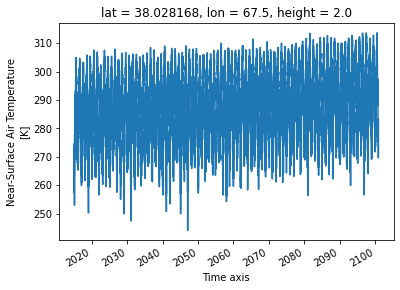

In [17]:
# Plot the timeseries
%matplotlib inline
# da.plot()

/home/testuser/anaconda3/envs/climatedata/lib/python3.8/site-packages/xarray/core/common.py:978: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


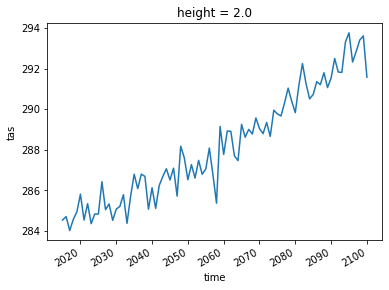

In [22]:
da_yr = da.resample(time="YS").mean()
# da_yr.plot()

In [32]:
# search of a set of temperature files
ctx = conn.new_context(project='CMIP6', query='tas', frequency='day', source_id='IPSL-CM6A-LR', experiment_id='ssp126')

# print out the url locations
c = 0
for i in ctx.search():
    if c < 1:
        files = i.file_context().search()
        for file in files:
            print(file.opendap_url)
        c = c+1   

http://vesg.ipsl.upmc.fr/thredds/dodsC/cmip6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp126/r2i1p1f1/day/tas/gr/v20190614/tas_day_IPSL-CM6A-LR_ssp126_r2i1p1f1_gr_20150101-21001231.nc


In [35]:
# access the file
ds_126 = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})
# select the area of Paris, due to the low resolution of CMIP6 it will result in just one grid-point
da_126 = ds_126['tas']
# da = da.isel(time=slice(0, 1000)) # fetching just the first 1000 days
da_126 = da_126.sel(lat=slice(38, 39), lon=slice(67, 69))

/home/testuser/anaconda3/envs/climatedata/lib/python3.8/site-packages/xarray/core/common.py:978: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


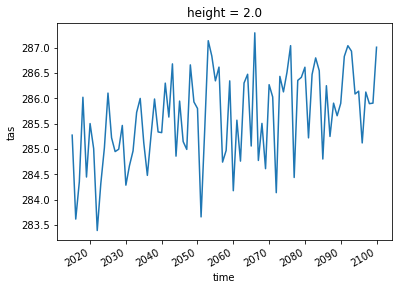

In [36]:
da126_yr = da_126.resample(time="YS").mean()
# da126_yr.plot()

(16436.0, 47482.0)

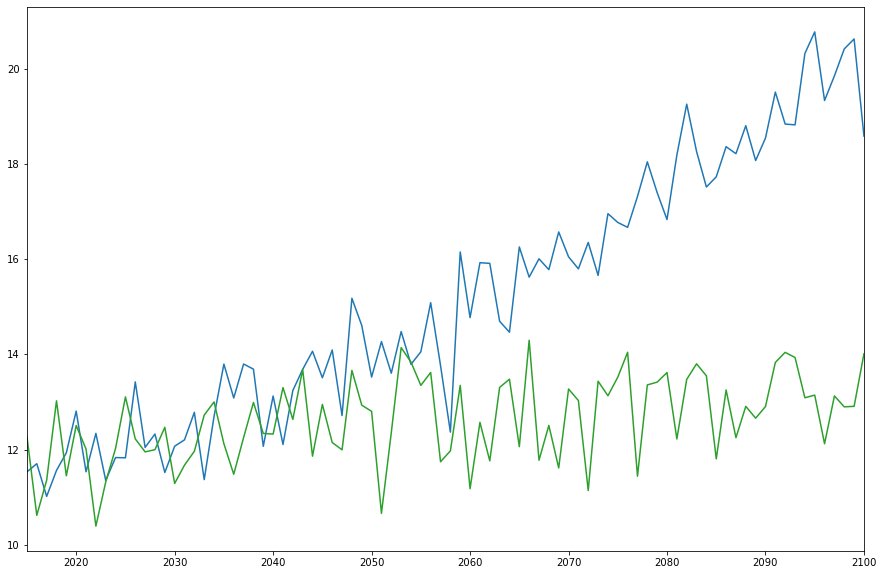

In [55]:
from matplotlib import pyplot as plt

# defining a new graphic 
fig = plt.figure( figsize=(15,10), facecolor='w', edgecolor='k')

plt.plot(da_yr.time, da_yr.values -273,15)
plt.plot(da126_yr.time, da126_yr.values -273,15)

plt.xlim(da126_yr.time.values[0],da126_yr.time.values[-1])